In [522]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [523]:
#Metodo de Simpson
def Simpson(h,ly):
    simpson =  h*( ly[0] + 4.0*ly[1] + ly[-1] )/3.0
    return simpson
def eu(x):
    return np.exp(x)

x=np.arange(0,0.3,0.1)
ys=eu(x)
print ys,x
h=0.1
print Simpson(0.1,eu(x))

[ 1.          1.10517092  1.22140276] [ 0.   0.1  0.2]
0.221402881015


In [524]:
#Modelos del Universo

#Omegas en orden M,R,A
omegas=[0.266,8.24e-5,0.734]

#Modelo de Einstein
def E(a):
    p=a**0.5
    return p

#Modelo de radiaccion dominante
def R(a,omegas):
    den = ( omegas[1] + a**2.0*(1 - omegas[1]) )**0.5
    r=a/den
    return r

#Modelo WMAP9
def WMAP9(a,omegas):
    omega = sum(omegas)
    t = (1-omega) + omegas[0]*a**(-1) + omegas[1]*a**(-2) + omegas[2]*a**2.0 
    q=t**(-0.5)
    return q

In [525]:
#listas
a=np.arange(1e-4,3,0.01)
h=abs(a[1]-a[0])

Le=E(a)
Lr=R(a,omegas)
Lw=WMAP9(a,omegas)
#print a
#print h
print len(a)
#print Le,Lr,Lw

300


In [526]:
#Organizando los elementos de las listas para usar Simpson
Oe = np.reshape(Le, (int(len(a)/3.0), 3))
Or = np.reshape(Lr, (int(len(a)/3.0), 3))
Ow = np.reshape(Lw, (int(len(a)/3.0), 3))
#print Oe,Or,Ow
print len(Oe),len(Or),len(Ow)
print Le[2:5]
#print Oe

100 100 100
[ 0.14177447  0.17349352  0.20024984]


In [527]:
#Integracion
lim=int(len(a)/2.0)

aE=[]
aR=[]
aW=[]

sumaE=0.0
sumaR=0.0
sumaW=0.0

for i in xrange(0,lim):
    sumaE = sumaE + Simpson(h, Le[2*i:2*i+3])
    aE.append(sumaE)
    
    sumaR = sumaR+ Simpson(h, Lr[2*i:2*i+3])
    aR.append(sumaR)
    
    sumaW = sumaW + Simpson(h, Lw[2*i:2*i+3])
    aW.append(sumaW)
    
print sumaE,sumaR,sumaW

3.46421101065 2.99116742077 2.21874267673


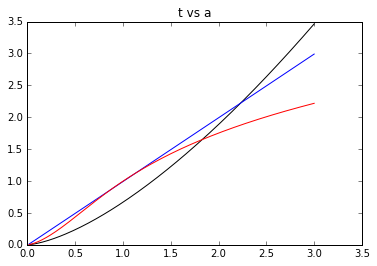

In [528]:
#Graficos
va=[]
suma=0.0
for i in xrange(0,lim):
    suma=suma+0.01*2
    va.append(suma)

plt.plot(va,aE,'black')
plt.plot(va,aR,'blue')
plt.plot(va,aW,'red')
plt.title('t vs a')